## Feature Engineering and Data Gathering

In [149]:
## Importing all the modules

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tools
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import RepeatedKFold
from scipy import stats

In [57]:
## I downloaded the dataframe from the Capstone_EDA notebook

df = pd.read_csv('clean_merged.csv')

In [58]:
## Checking that its imported properly

df.head(20)

,Unnamed: 0,name,current_club_name,country_of_citizenship,position,sub_position,market_value_in_eur,contract_expiration_date,current_club_domestic_competition_id,overall_score,...,Weight,Age,preferred_foot,ball_skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping
0,0,Lenny Joseph,Fc Metz,France,Attack,Centre-Forward,400000.0,2024-06-30,FR1,64,...,73,22,Right,60.0,15.0,45.166667,51.000000,67.142857,59.125,10.8
1,1,Mamadou Camara,Es Troyes Ac,France,Attack,Centre-Forward,400000.0,2025-06-30,FR1,61,...,71,22,Right,62.0,22.0,40.666667,48.666667,61.714286,55.375,10.6
2,2,Mamadou Camara,Es Troyes Ac,France,Attack,Centre-Forward,400000.0,2025-06-30,FR1,60,...,75,20,Left,62.0,56.5,56.666667,57.666667,50.000000,42.000,8.6
3,3,Mamadou Camara,Rc Lens,Senegal,Midfield,Central Midfield,250000.0,2024-06-30,FR1,61,...,71,22,Right,62.0,22.0,40.666667,48.666667,61.714286,55.375,10.6
4,4,Mamadou Camara,Rc Lens,Senegal,Midfield,Central Midfield,250000.0,2024-06-30,FR1,60,...,75,20,Left,62.0,56.5,56.666667,57.666667,50.000000,42.000,8.6
5,5,Robin Kehr,Spvgg Greuther Furth,Germany,Attack,Centre-Forward,100000.0,2023-06-30,L1,63,...,81,23,Left,62.5,24.0,43.666667,54.666667,70.857143,52.375,11.0
6,7,Yohann Thuram,Ionikos Nikeas,Brazil,Attack,Centre-Forward,325000.0,2023-06-30,GR1,64,...,85,34,Right,12.0,13.0,35.166667,26.000000,53.142857,20.000,61.6
7,8,Benjamin Tetteh,Yeni Malatyaspor,Ghana,Attack,Centre-Forward,2000000.0,2024-06-30,TR1,72,...,91,25,Right,72.5,25.5,59.833333,58.333333,71.571429,61.750,9.4
8,9,Stevie Mallan,Yeni Malatyaspor,Scotland,Midfield,Central Midfield,500000.0,2024-06-30,TR1,64,...,69,26,Right,63.5,60.5,61.333333,66.333333,67.857143,63.500,8.0
9,10,Didier Ndong,Yeni Malatyaspor,Gabon,Midfield,Central Midfield,1500000.0,2023-06-30,TR1,69,...,75,28,Right,65.0,63.0,67.000000,67.333333,74.428571,59.125,12.2


In [59]:
## This has created an unnecessary column

df.drop(columns = 'Unnamed: 0', inplace=True)

In [60]:
## We can now move onto feature engineering
## As there are many clubs, nationalities and positions, one hot encoding them will mean a lot of feature columns, thus I did not OHE these columns

df_encoded = pd.get_dummies(df, columns = ['current_club_domestic_competition_id'], drop_first=True, prefix='comp')
df_encoded = pd.get_dummies(df_encoded, columns = ['preferred_foot'], drop_first=True)
df_encoded = pd.get_dummies(df_encoded, columns = ['position'], drop_first=True)

In [61]:
df_encoded.head(20)

,name,current_club_name,country_of_citizenship,sub_position,market_value_in_eur,contract_expiration_date,overall_score,potential_score,Height,Weight,...,comp_NL1,comp_PO1,comp_RU1,comp_SC1,comp_TR1,comp_UKR1,preferred_foot_Right,position_Defender,position_Goalkeeper,position_Midfield
0,Lenny Joseph,Fc Metz,France,Centre-Forward,400000.0,2024-06-30,64,73,183,73,...,0,0,0,0,0,0,1,0,0,0
1,Mamadou Camara,Es Troyes Ac,France,Centre-Forward,400000.0,2025-06-30,61,70,186,71,...,0,0,0,0,0,0,1,0,0,0
2,Mamadou Camara,Es Troyes Ac,France,Centre-Forward,400000.0,2025-06-30,60,70,185,75,...,0,0,0,0,0,0,0,0,0,0
3,Mamadou Camara,Rc Lens,Senegal,Central Midfield,250000.0,2024-06-30,61,70,186,71,...,0,0,0,0,0,0,1,0,0,1
4,Mamadou Camara,Rc Lens,Senegal,Central Midfield,250000.0,2024-06-30,60,70,185,75,...,0,0,0,0,0,0,0,0,0,1
5,Robin Kehr,Spvgg Greuther Furth,Germany,Centre-Forward,100000.0,2023-06-30,63,75,189,81,...,0,0,0,0,0,0,0,0,0,0
6,Yohann Thuram,Ionikos Nikeas,Brazil,Centre-Forward,325000.0,2023-06-30,64,64,187,85,...,0,0,0,0,0,0,1,0,0,0
7,Benjamin Tetteh,Yeni Malatyaspor,Ghana,Centre-Forward,2000000.0,2024-06-30,72,76,193,91,...,0,0,0,0,1,0,1,0,0,0
8,Stevie Mallan,Yeni Malatyaspor,Scotland,Central Midfield,500000.0,2024-06-30,64,65,178,69,...,0,0,0,0,1,0,1,0,0,1
9,Didier Ndong,Yeni Malatyaspor,Gabon,Central Midfield,1500000.0,2023-06-30,69,70,179,75,...,0,0,0,0,1,0,1,0,0,1


In [62]:
## function written so do not have to repeatedly typing the same things

def statsmodel_log(dataframe, prediction, feature_col, log):

    X = dataframe[feature_col]
    X = sm.add_constant(X)

    if log == 1:
        y = np.log(dataframe[prediction])
    else:
        y = dataframe[prediction]

    global X_train
    global X_test
    global y_train
    global y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    lin_reg = sm.OLS(y_train, X_train[feature_columns])
    results = lin_reg.fit()
    X_train[prediction+'_pred'] = results.predict(X_train[feature_columns])

    if log == 1:
        rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_train), np.exp(X_train[prediction+'_pred']))
    else:
        rmse = statsmodels.tools.eval_measures.rmse(y_train, X_train[prediction+'_pred'])

    print(f'the RMSE is {rmse}')
    return results

## Model 1

In [63]:
## Run everything without any checks

feature_columns = ['overall_score', 'potential_score', 'Age', 'ball_skills', 'Defence',
                   'Mental', 'Passing', 'Physical', 'Shooting', 'Goalkeeping', 'comp_DK1',
                   'comp_ES1', 'comp_FR1', 'comp_GB1', 'comp_GR1', 'comp_IT1', 'comp_L1',
                   'comp_NL1', 'comp_PO1', 'comp_RU1', 'comp_SC1', 'comp_TR1', 'comp_UKR1',
                   'preferred_foot_Right', 'position_Defender', 'position_Goalkeeper',
                   'position_Midfield']

In [64]:
results = statsmodel_log(df_encoded, 'market_value_in_eur', feature_columns, 0)

the RMSE is 8324871.328490699


In [65]:
## RMSE of the test set

X_test['y_pred'] = results.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(y_test, X_test['y_pred'])
print(rmse)

8925651.068763647


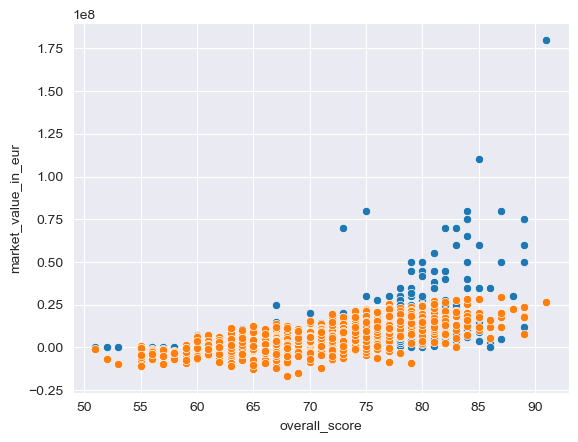

In [66]:
## Scatter plot to visualise how well the predictions are

sns.scatterplot(x=X_test['overall_score'], y=y_test)
sns.scatterplot(x=X_test['overall_score'], y=X_test['y_pred'])
plt.show()

In [67]:
## We see that the model does not do well in edge cases and that it actually predicts negative values
## Although the RMSE may look promising, this is not a good model to move forward

## Model 2

In [68]:
## Same feature columns as before, now we log the target column so we do not have negative predictions

results = statsmodel_log(df_encoded, 'market_value_in_eur', feature_columns, 1)

the RMSE is 6937054.07295598


In [69]:
## RMSE of the test set

X_test['y_pred'] = results.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_test), np.exp(X_test['y_pred']))
print(rmse)

7548407.760876076


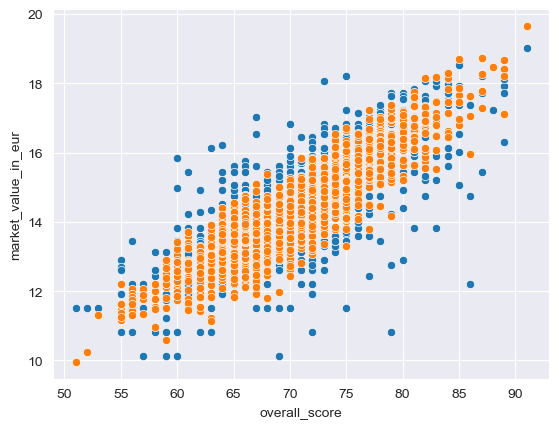

In [70]:
## visualisation

sns.scatterplot(x=X_test['overall_score'], y=y_test)
sns.scatterplot(x=X_test['overall_score'], y=X_test['y_pred'])
plt.show()

In [71]:
## This model performs much better in terms of RMSE and does not predict negative market values
## I would want to move forward with this model
## Lets take a look at the summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     market_value_in_eur   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          7.748e+04
Date:                 Tue, 04 Apr 2023   Prob (F-statistic):                        0.00
Time:                         13:24:46   Log-Likelihood:                         -5654.2
No. Observations:                 5225   AIC:                                  1.136e+04
Df Residuals:                     5198   BIC:                                  1.154e+04
Df Model:                           27                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
overall_score            0.2142      0.005     46.831      0.000       0.205       0.223
potential_score          0.0148      0.003      5.498      0.000       0.010       0.020
Age                     -0.1105      0.003    -31.855      0.000      -0.117      -0.104
ball_skills              0.0030      0.003      1.161      0.246      -0.002       0.008
Defence                  0.0015      0.001      1.197      0.231      -0.001       0.004
Mental                   0.0006      0.003      0.191      0.848      -0.006       0.007
Passing                 -0.0069      0.002     -3.049      0.002      -0.011      -0.002
Physical                 0.0125      0.002      6.949      0.000       0.009       0.016
Shooting                 0.0024      0.002      1.157      0.247      -0.002       0.006
Goalkeeping             -0.0006      0.002     -0.235      0.814      -0.005       0.004
comp_DK1                 0.0697      0.055      1.264      0.206      -0.038       0.178
comp_ES1                -0.0363      0.048     -0.753      0.452      -0.131       0.058
comp_FR1                 0.2358      0.048      4.962      0.000       0.143       0.329
comp_GB1                 0.6698      0.048     13.899      0.000       0.575       0.764
comp_GR1                -0.1763      0.079     -2.244      0.025      -0.330      -0.022
comp_IT1                 0.2266      0.049      4.658      0.000       0.131       0.322
comp_L1                  0.1960      0.049      3.997      0.000       0.100       0.292
comp_NL1                -0.0140      0.050     -0.282      0.778      -0.111       0.083
comp_PO1                -0.3797      0.049     -7.753      0.000      -0.476      -0.284
comp_RU1                 0.6481      0.126      5.127      0.000       0.400       0.896
comp_SC1                 0.1913      0.054      3.535      0.000       0.085       0.297
comp_TR1                 0.1793      0.050      3.591      0.000       0.081       0.277
comp_UKR1                0.0519      0.098      0.527      0.598      -0.141       0.245
preferred_foot_Right     0.0570      0.023      2.451      0.014       0.011       0.103
position_Defender       -0.0196      0.043     -0.452      0.651      -0.105       0.065
position_Goalkeeper     -0.0698      0.099     -0.702      0.483      -0.265       0.125
position_Midfield       -0.0159      0.040     -0.399      0.690      -0.094       0.062
==============================================================================
Omnibus:                      805.531   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9658.059
Skew:                          -0.337   Prob(JB):                 

In [72]:
## The R-squared looks great but the conditional number and significance are not
## I would like to run some checks on the features
## Functions taken from previous projects I had in Digital Futures

## This function reduces the conditional number

def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

## This function checks for the signicance and drops them

def stepwise_selection(X, y, threshold_in = 0.01, threshold_out = 0.05, verbose = True):
    # The function is checking for p-values (whether features are statistically significant), the lower the better
    included = [] # this is going to be the list of features we keep
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        # we add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # specifying the verbose text

        # backward step: removing features if new features added to the list make them statistically insignificant
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()

        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        # if the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [74]:
## Now lets run them

calculate_vif(X_train[feature_columns])

dropping 'overall_score' at index: 0
dropping 'Mental' at index: 4
dropping 'ball_skills' at index: 2
dropping 'potential_score' at index: 0
dropping 'Passing' at index: 2
dropping 'Physical' at index: 2
dropping 'Age' at index: 0
dropping 'Defence' at index: 0
dropping 'Goalkeeping' at index: 1
dropping 'Shooting' at index: 0
Remaining variables:
Index(['comp_DK1', 'comp_ES1', 'comp_FR1', 'comp_GB1', 'comp_GR1', 'comp_IT1',
       'comp_L1', 'comp_NL1', 'comp_PO1', 'comp_RU1', 'comp_SC1', 'comp_TR1',
       'comp_UKR1', 'preferred_foot_Right', 'position_Defender',
       'position_Goalkeeper', 'position_Midfield'],
      dtype='object')


,comp_DK1,comp_ES1,comp_FR1,comp_GB1,comp_GR1,comp_IT1,comp_L1,comp_NL1,comp_PO1,comp_RU1,comp_SC1,comp_TR1,comp_UKR1,preferred_foot_Right,position_Defender,position_Goalkeeper,position_Midfield
5572,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
6072,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5445,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
5185,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
6290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5191,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
5226,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5390,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [75]:
## As expected, the number of columns reduced

feature_columns = ['comp_DK1', 'comp_ES1', 'comp_FR1', 'comp_GB1', 'comp_GR1', 'comp_IT1',
                     'comp_L1', 'comp_NL1', 'comp_PO1', 'comp_RU1', 'comp_SC1', 'comp_TR1',
                     'comp_UKR1', 'preferred_foot_Right', 'position_Defender',
                     'position_Goalkeeper', 'position_Midfield']

result = stepwise_selection(X_train[feature_columns], y_train)
print('resulting features:')
print(result)

Add  comp_GB1                       with p-value 1.28845e-121
Add  position_Goalkeeper            with p-value 1.83235e-61
Add  comp_IT1                       with p-value 5.33918e-35
Add  comp_ES1                       with p-value 2.10846e-38
Add  comp_L1                        with p-value 9.05116e-50
Add  comp_FR1                       with p-value 3.5315e-46
Add  comp_SC1                       with p-value 2.7732e-09
Add  comp_DK1                       with p-value 3.18466e-09
Add  position_Defender              with p-value 8.23381e-06
resulting features:
['comp_GB1', 'position_Goalkeeper', 'comp_IT1', 'comp_ES1', 'comp_L1', 'comp_FR1', 'comp_SC1', 'comp_DK1', 'position_Defender']


In [76]:
## We are only left with very few columns, let us view the metrics for these

feature_columns = ['comp_GB1', 'position_Goalkeeper', 'comp_IT1', 'comp_ES1', 'comp_L1', 'comp_FR1', 'comp_SC1', 'comp_DK1', 'position_Defender']

results = statsmodel_log(df_encoded, 'market_value_in_eur', feature_columns, 1)

the RMSE is 82921049.27169997


In [77]:
## RMSE of the test set

X_test['y_pred'] = results.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_test), np.exp(X_test['y_pred']))
print(rmse)

92613817.27270652


In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     market_value_in_eur   R-squared (uncentered):                   0.725
Model:                             OLS   Adj. R-squared (uncentered):              0.725
Method:                  Least Squares   F-statistic:                              1530.
Date:                 Tue, 04 Apr 2023   Prob (F-statistic):                        0.00
Time:                         13:25:03   Log-Likelihood:                         -17954.
No. Observations:                 5225   AIC:                                  3.593e+04
Df Residuals:                     5216   BIC:                                  3.599e+04
Df Model:                            9                                                  
Covariance Type:             nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
comp_GB1               12.7681      0.322     39.657      0.000      12.137      13.399
position_Goalkeeper     5.8665      0.328     17.898      0.000       5.224       6.509
comp_IT1               11.9316      0.338     35.320      0.000      11.269      12.594
comp_ES1               11.6127      0.329     35.313      0.000      10.968      12.257
comp_L1                11.7698      0.350     33.633      0.000      11.084      12.456
comp_FR1               11.4377      0.332     34.462      0.000      10.787      12.088
comp_SC1               10.2778      0.437     23.537      0.000       9.422      11.134
comp_DK1               10.1424      0.449     22.587      0.000       9.262      11.023
position_Defender       6.9621      0.205     34.007      0.000       6.561       7.363
==============================================================================
Omnibus:                      784.744   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.192
Skew:                           0.250   Prob(JB):                     2.31e-51
Kurtosis:                       2.094   Cond. No.                         2.73
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
## As expected, the RMSE drastically increased since the number of features reduced
## The R-squared is also worse off, however the conditional number is now much much better and there are no significant features
## For the content and purpose of this Capstone, I opted to not run the checks. For the following reasons:
## 1. I expected the multicollinearity issue in my features, since as ones stats increase, their overall/potential scores increases. Also their scores relates to the clubs they
## play for, and many other similar relationships in the features
## 2. I expect the significance in the features, from EDA, we saw how the market values differs in different areas. For example, one playing in the Premier League would have
## a huge impact on the market value.
## 3. The purpose of this project is to have an accurate prediction of player values, having an RMSE of 8m - 9m can be considered far off and if the club is to invest based off
## my model, it can be very costly.

## From now on, I will focus on the RMSE and focussing on only improving the RMSE

## Model 3

In [81]:
## Keeping the top 20 nations and grouping the rest as 'other'
## Then OHE the nationalities column

def country_groups(x):
    countries =['Spain','France','England','Portugal','Brazil','Netherlands','Germany','Italy','Belgium','Denmark','Turkey','Scotland','Argentina','Sweden','Norway','Senegal','Croatia','Morocco','Nigeria','Poland']

    if x not in countries:
        return 'other'
    else:
        return x


df_encoded['country_groups'] = df_encoded['country_of_citizenship'].apply(country_groups)

df_encoded = pd.get_dummies(df_encoded, columns=['country_groups'], drop_first=True)

In [82]:
df_encoded.head(20)

,name,current_club_name,country_of_citizenship,sub_position,market_value_in_eur,contract_expiration_date,overall_score,potential_score,Height,Weight,...,country_groups_Nigeria,country_groups_Norway,country_groups_Poland,country_groups_Portugal,country_groups_Scotland,country_groups_Senegal,country_groups_Spain,country_groups_Sweden,country_groups_Turkey,country_groups_other
0,Lenny Joseph,Fc Metz,France,Centre-Forward,400000.0,2024-06-30,64,73,183,73,...,0,0,0,0,0,0,0,0,0,0
1,Mamadou Camara,Es Troyes Ac,France,Centre-Forward,400000.0,2025-06-30,61,70,186,71,...,0,0,0,0,0,0,0,0,0,0
2,Mamadou Camara,Es Troyes Ac,France,Centre-Forward,400000.0,2025-06-30,60,70,185,75,...,0,0,0,0,0,0,0,0,0,0
3,Mamadou Camara,Rc Lens,Senegal,Central Midfield,250000.0,2024-06-30,61,70,186,71,...,0,0,0,0,0,1,0,0,0,0
4,Mamadou Camara,Rc Lens,Senegal,Central Midfield,250000.0,2024-06-30,60,70,185,75,...,0,0,0,0,0,1,0,0,0,0
5,Robin Kehr,Spvgg Greuther Furth,Germany,Centre-Forward,100000.0,2023-06-30,63,75,189,81,...,0,0,0,0,0,0,0,0,0,0
6,Yohann Thuram,Ionikos Nikeas,Brazil,Centre-Forward,325000.0,2023-06-30,64,64,187,85,...,0,0,0,0,0,0,0,0,0,0
7,Benjamin Tetteh,Yeni Malatyaspor,Ghana,Centre-Forward,2000000.0,2024-06-30,72,76,193,91,...,0,0,0,0,0,0,0,0,0,1
8,Stevie Mallan,Yeni Malatyaspor,Scotland,Central Midfield,500000.0,2024-06-30,64,65,178,69,...,0,0,0,0,1,0,0,0,0,0
9,Didier Ndong,Yeni Malatyaspor,Gabon,Central Midfield,1500000.0,2023-06-30,69,70,179,75,...,0,0,0,0,0,0,0,0,0,1


In [83]:
## Let us check the results

feature_columns = list(df_encoded.columns)
for columns in ['name', 'current_club_name', 'country_of_citizenship', 'sub_position','market_value_in_eur', 'contract_expiration_date']:
    feature_columns.remove(columns)

results = statsmodel_log(df_encoded, 'market_value_in_eur', feature_columns, 1)

the RMSE is 6179977.243893202


In [84]:
## RMSE of the test set

X_test['y_pred'] = results.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_test), np.exp(X_test['y_pred']))
print(rmse)

5780153.379193726


In [85]:
## The RMSE is better compared to model 2, because we have more information.

## Model 4

In [86]:
## From EDA, we know that market values for players in different positions varies
## I want to split up the dataframe into 4 by position

df_encoded['position'] = df['position']
df_encoded.drop(columns=['position_Defender', 'position_Goalkeeper', 'position_Midfield'], inplace = True)

In [104]:
X_forwards = df_encoded[df_encoded['position'] == 'Attack'].copy()
X_midfielders = df_encoded[df_encoded['position'] == 'Midfield'].copy()
X_defenders = df_encoded[df_encoded['position'] == 'Defender'].copy()
X_goalkeepers = df_encoded[df_encoded['position'] == 'Goalkeeper'].copy()

In [97]:
## Now, I can also OHE the sub_position column and in choosing the features, I can use domain knowledge to choose ones that are useful
## A good example of this would be that the goalkeeper scores would not be a good feature in determining forward prices

## On forwards

X_forwards = pd.get_dummies(X_forwards, columns=['sub_position'], drop_first=True)

feature_columns = list(X_forwards.columns)
for columns in ['name', 'current_club_name', 'country_of_citizenship', 'market_value_in_eur',
                'contract_expiration_date', 'Goalkeeping', 'Defence', 'position']:
    feature_columns.remove(columns)

results = statsmodel_log(X_forwards, 'market_value_in_eur', feature_columns, 1)

the RMSE is 10387542.725628385


In [98]:
## RMSE of the test set

X_test['y_pred'] = results.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_test), np.exp(X_test['y_pred']))
print(rmse)

7008301.128618931


In [99]:
## The above RMSE is worse than what I had for model 4
## However, this is expected, as in the forwards there are extreme outliers that can heavily affect the linear modelling
## on the midfielders, we expect an improvement

X_midfielders = pd.get_dummies(X_midfielders, columns=['sub_position'], drop_first=True)

feature_columns = list(X_midfielders.columns)
for columns in ['name', 'current_club_name', 'country_of_citizenship', 'market_value_in_eur',
                'contract_expiration_date', 'Goalkeeping', 'position']:
    feature_columns.remove(columns)

results = statsmodel_log(X_midfielders, 'market_value_in_eur', feature_columns, 1)

the RMSE is 6156337.092263392


In [100]:
## RMSE of the test set

X_test['y_pred'] = results.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_test), np.exp(X_test['y_pred']))
print(rmse)

5491001.522493282


In [105]:
## Indeed the RMSE did improve, let us explore the other 2 positions

## On defenders

X_defenders = pd.get_dummies(X_defenders, columns=['sub_position'], drop_first=True)

feature_columns = list(X_defenders.columns)
for columns in ['name', 'current_club_name', 'country_of_citizenship', 'market_value_in_eur',
                'contract_expiration_date', 'Goalkeeping', 'Shooting', 'position']:
    feature_columns.remove(columns)

results = statsmodel_log(X_defenders, 'market_value_in_eur', feature_columns, 1)

the RMSE is 5132032.798083193


In [106]:
## RMSE of the test set

X_test['y_pred'] = results.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_test), np.exp(X_test['y_pred']))
print(rmse)

4563532.063736382


In [107]:
## On goalkeepers

X_goalkeepers = pd.get_dummies(X_goalkeepers, columns=['sub_position'], drop_first=True)

feature_columns = list(X_goalkeepers.columns)
for columns in ['name', 'current_club_name', 'country_of_citizenship', 'market_value_in_eur',
                'contract_expiration_date', 'Shooting', 'Defence', 'Passing', 'Mental', 'ball_skills',
                 'position']:
    feature_columns.remove(columns)

results = statsmodel_log(X_goalkeepers, 'market_value_in_eur', feature_columns, 1)

the RMSE is 3691203.0004070345


In [108]:
## RMSE of the test set

X_test['y_pred'] = results.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_test), np.exp(X_test['y_pred']))
print(rmse)

2758405.7811510046


In [ ]:
## Overall, the RMSE increased in the forwards dataframe but not in the others, in fact, for defenders and goalkeepers, it has seen significant improvement
## I will focus on improving the modelling for the forwards dataframe, assuming that what I do to the forwards dataframe to improve RMSE will also improve RMSE for the others

## Model 5

In [118]:
## Before coming up with this model, I had tested Model 4 with different scalings in the features
## But this did not improve the RMSE and so I will not show them here
## Now for model 5, I will split up the forwards dataframe into two dataframe using the potential score

X_forwards = df_encoded[df_encoded['position'] == 'Attack'].copy()

X_forwards = pd.get_dummies(X_forwards, columns=['sub_position'], drop_first=True)

In [119]:
## The value of 79 comes from the fact that it splits the forwards dataframe into the upper quartile and the lower 3 quartiles

X_forwards_1 = X_forwards[X_forwards['potential_score'] >= 79].copy()

In [120]:
## The index becomes quite messy, so we reset them

index = X_forwards[X_forwards['potential_score'] >= 79].index
X_forwards.drop(index, inplace=True)
X_forwards_1.reset_index(inplace=True)
X_forwards.reset_index(inplace=True)

In [121]:
## We have some errors from joining the 2 datasets
## I want to drop them here

X_forwards_1['name'].value_counts()

Joao Pedro          6
Antony              4
Raul Garcia         4
Berna               2
Joaquin             2
                   ..
Andrea Pinamonti    1
Armand Lauriente    1
Levi Garcia         1
Nils Mortimer       1
Yari Verschaeren    1
Name: name, Length: 616, dtype: int64

In [122]:
## Using for loop, we get rid of the rows
## I have chosen to keep the player with the highest market value and higher potential score as we are working with the upper quartile

names_list = ['Joao Pedro', 'Pepe', 'Luis Diaz', 'Andre Silva', 'Vitinha', 'Antony', 'Luis Javier Suarez',
              'Raul Garcia', 'Pepe', 'Danilo', 'Fernando', 'Nuno Santos', 'Berna', 'Joaquin']

for names in names_list:
    index = X_forwards_1[X_forwards_1['name'] == names].index
    maximum = max(list(X_forwards_1['market_value_in_eur'].loc[index]))
    index = X_forwards_1[X_forwards_1['name'] == names][X_forwards_1.loc[index]['market_value_in_eur'] != maximum].index
    X_forwards_1.drop(index, inplace=True)

for names in names_list:
    index = X_forwards_1[X_forwards_1['name'] == names].index
    maximum = max(list(X_forwards_1['potential_score'].loc[index]))
    index = X_forwards_1[X_forwards_1['name'] == names][X_forwards_1.loc[index]['potential_score'] != maximum].index
    X_forwards_1.drop(index, inplace=True)

In [123]:
X_forwards_1.reset_index(inplace=True)
X_forwards_1.drop(columns=['level_0', 'index'], inplace=True)
X_forwards.drop(columns='index', inplace=True)

feature_columns = list(X_forwards_1.columns)
for columns in ['name', 'current_club_name', 'country_of_citizenship', 'market_value_in_eur',
                'contract_expiration_date', 'Goalkeeping', 'Defence', 'position']:
    feature_columns.remove(columns)


In [128]:
## RMSE for the forward 79+ set (training)

results = statsmodel_log(X_forwards_1, 'market_value_in_eur', feature_columns, 1)

the RMSE is 13420886.15577307


In [129]:
## RMSE for the forward 79- set (training)

results = statsmodel_log(X_forwards, 'market_value_in_eur', feature_columns, 1)

the RMSE is 2228161.298190718


In [130]:
## As expected, the RMSE for the upper quartile is much worse than the other models
## However, for the lower 3 quartiles, it significantly improved
## Moving forward, I tried different regularisation techniques and tried to see if they improved the score

In [132]:
## the different linear models
## to run for the outlier set, run the cell 'forward 79+ set' and don't run the cell 'forward 79- set'

reg_las = linear_model.Lasso(alpha = 0.5)
reg_rdg = linear_model.Ridge(alpha = 0.5)
reg_en = linear_model.ElasticNet(alpha = 0.5)

las_results = reg_las.fit(X_train[feature_columns], y_train)
rdg_results = reg_rdg.fit(X_train[feature_columns], y_train)
en_results = reg_en.fit(X_train[feature_columns], y_train)

In [133]:
# predictions

X_train['las_y_pred'] = las_results.predict(X_train[feature_columns])
X_train['rdg_y_pred'] = rdg_results.predict(X_train[feature_columns])
X_train['en_y_pred'] = en_results.predict(X_train[feature_columns])

In [134]:
## RMSE for lasso

rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_train), np.exp(X_train['las_y_pred']))
print(rmse)

2994188.7309383727


In [135]:
## RMSE for elastic net

rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_train), np.exp(X_train['en_y_pred']))
print(rmse)

2844099.351538543


In [136]:
## RMSE for ridge

rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_train), np.exp(X_train['rdg_y_pred']))
print(rmse)

2234567.4798073573


In [137]:
## It seems like Ridge is better on the 79- set, while elastic net seems better on the 79+ set

In [ ]:
## To further improve the RMSE, I ran a gridsearch to find the optimal hyperparameters for each dataset

In [140]:
## for 79+ set
## RMSE before

results = statsmodel_log(X_forwards_1, 'market_value_in_eur', feature_columns, 1)

the RMSE is 13420886.15577307


In [141]:
model = ElasticNet()
cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=42)
param = {
    'alpha': [0.5, 1, 5, 10, 25, 100],
    'positive': [True, False]
}

In [142]:
search = GridSearchCV(model, param, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [143]:
## the best hyperparameters

result = search.fit(X_train[feature_columns], y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.6986915941145502
Best Hyperparameters: {'alpha': 0.5, 'positive': False}


In [144]:
## predicting using the new hyperparameters

reg_en = linear_model.ElasticNet(alpha = 0.5, positive= False, max_iter = 1000)
en_results = reg_en.fit(X_train[feature_columns], y_train)
X_train['en_y_pred'] = en_results.predict(X_train[feature_columns])

In [146]:
## RMSE for the training set

rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_train), np.exp(X_train['en_y_pred']))
print(rmse)

9697886.118809404


In [148]:
## RMSE for the testing set

X_test['en_y_pred'] = en_results.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_test), np.exp(X_test['en_y_pred']))
print(rmse)

7574165.397240184


In [ ]:
## We see an improvement in the RMSE for the 79+ set, however this is an underfitting model
## This is expected, since the extremely outliers are in this set, and they heavily influence the market value modelling

In [150]:
## for 79- set
## RMSE before

results = statsmodel_log(X_forwards, 'market_value_in_eur', feature_columns, 1)

the RMSE is 2228161.298190718


In [152]:
model = Ridge()
cv = RepeatedKFold(n_splits=7, n_repeats=1, random_state=42)
param = {
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'alpha': [0.5, 1, 5, 10, 25, 100],
    'positive': [True, False]
}

In [153]:
search = GridSearchCV(model, param, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)



In [154]:
## finding the best hyperparameters

result = search.fit(X_train[feature_columns], y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.6865525394391699
Best Hyperparameters: {'alpha': 10, 'positive': False, 'solver': 'sparse_cg'}


C:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
294 fits failed out of a total of 672.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 712, in fit
    raise ValueError(
ValueError: solver='svd' 

In [155]:
## modelling using new hyperparameters and predicting on training set

reg_rdg = linear_model.Ridge(alpha = 10, positive= False ,solver= 'sparse_cg')
rdg_results = reg_rdg.fit(X_train[feature_columns], y_train)
X_train['rdg_y_pred'] = rdg_results.predict(X_train[feature_columns])

In [158]:
## RMSE for train

rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_train), np.exp(X_train['rdg_y_pred']))
print(rmse)

2256893.5398448906


In [160]:
## RMSE for testing set

X_test['rdg_y_pred'] = rdg_results.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_test), np.exp(X_test['rdg_y_pred']))
print(rmse)

4512131.055263945


In [161]:
## Here, we have an overfitting model
## I conclude from these results that a different split may be better

## Model 6

In [181]:
## From the EDA, we know that market values of players in different competitions varies
## Now, I want to group players from the top 5 leagues together and the rest as other
## Then split them into 2 dataframes according to the type of competition they are in
## My own domain knowledge has helped in this, because I know the top 5 leagues in Europe

def comp_groups(x):
    comps = ['GB1', 'ES1', 'FR1', 'IT1', 'L1']

    if x not in comps:
        return 'other'
    else:
        return 'major'

In [182]:
## OHE etc and applying the above function

df_encoded_1 = pd.get_dummies(df, columns=['preferred_foot'], drop_first=True)
df_encoded_1['country_groups'] = df_encoded_1['country_of_citizenship'].apply(country_groups)
df_encoded_1['comp_groups'] = df_encoded_1['current_club_domestic_competition_id'].apply(comp_groups)
df_encoded_1.head(20)

,name,current_club_name,country_of_citizenship,position,sub_position,market_value_in_eur,contract_expiration_date,current_club_domestic_competition_id,overall_score,potential_score,...,ball_skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping,preferred_foot_Right,country_groups,comp_groups
0,Lenny Joseph,Fc Metz,France,Attack,Centre-Forward,400000.0,2024-06-30,FR1,64,73,...,60.0,15.0,45.166667,51.000000,67.142857,59.125,10.8,1,France,major
1,Mamadou Camara,Es Troyes Ac,France,Attack,Centre-Forward,400000.0,2025-06-30,FR1,61,70,...,62.0,22.0,40.666667,48.666667,61.714286,55.375,10.6,1,France,major
2,Mamadou Camara,Es Troyes Ac,France,Attack,Centre-Forward,400000.0,2025-06-30,FR1,60,70,...,62.0,56.5,56.666667,57.666667,50.000000,42.000,8.6,0,France,major
3,Mamadou Camara,Rc Lens,Senegal,Midfield,Central Midfield,250000.0,2024-06-30,FR1,61,70,...,62.0,22.0,40.666667,48.666667,61.714286,55.375,10.6,1,Senegal,major
4,Mamadou Camara,Rc Lens,Senegal,Midfield,Central Midfield,250000.0,2024-06-30,FR1,60,70,...,62.0,56.5,56.666667,57.666667,50.000000,42.000,8.6,0,Senegal,major
5,Robin Kehr,Spvgg Greuther Furth,Germany,Attack,Centre-Forward,100000.0,2023-06-30,L1,63,75,...,62.5,24.0,43.666667,54.666667,70.857143,52.375,11.0,0,Germany,major
6,Yohann Thuram,Ionikos Nikeas,Brazil,Attack,Centre-Forward,325000.0,2023-06-30,GR1,64,64,...,12.0,13.0,35.166667,26.000000,53.142857,20.000,61.6,1,Brazil,other
7,Benjamin Tetteh,Yeni Malatyaspor,Ghana,Attack,Centre-Forward,2000000.0,2024-06-30,TR1,72,76,...,72.5,25.5,59.833333,58.333333,71.571429,61.750,9.4,1,other,other
8,Stevie Mallan,Yeni Malatyaspor,Scotland,Midfield,Central Midfield,500000.0,2024-06-30,TR1,64,65,...,63.5,60.5,61.333333,66.333333,67.857143,63.500,8.0,1,Scotland,other
9,Didier Ndong,Yeni Malatyaspor,Gabon,Midfield,Central Midfield,1500000.0,2023-06-30,TR1,69,70,...,65.0,63.0,67.000000,67.333333,74.428571,59.125,12.2,1,other,other


In [183]:
## Splitting into the positions and OHE the forwards dataframe

X_forwards = df_encoded_1[df_encoded_1['position'] == 'Attack']
X_forwards = pd.get_dummies(X_forwards, columns=['sub_position'], drop_first=True)
X_forwards = pd.get_dummies(X_forwards, columns = ['country_groups'], drop_first=True)

In [184]:
X_forwards.drop(columns = ['current_club_name', 'country_of_citizenship', 'position', 'contract_expiration_date', 'current_club_domestic_competition_id'], inplace = True)

In [185]:
## the space and - in the column name can be an issue (this is just for something later, does not affect the modelling)

column_list = []
for things in list(X_forwards.columns):
    column_list.append(things.replace(' ', '_'))

X_forwards.columns = column_list

X_forwards.rename(columns={'sub_position_Centre-Forward': 'sub_position_Centre_Forward'}, inplace=True)
X_forwards.head(20)

,name,market_value_in_eur,overall_score,potential_score,Height,Weight,Age,ball_skills,Defence,Mental,...,country_groups_Nigeria,country_groups_Norway,country_groups_Poland,country_groups_Portugal,country_groups_Scotland,country_groups_Senegal,country_groups_Spain,country_groups_Sweden,country_groups_Turkey,country_groups_other
0,Lenny Joseph,400000.0,64,73,183,73,22,60.0,15.0,45.166667,...,0,0,0,0,0,0,0,0,0,0
1,Mamadou Camara,400000.0,61,70,186,71,22,62.0,22.0,40.666667,...,0,0,0,0,0,0,0,0,0,0
2,Mamadou Camara,400000.0,60,70,185,75,20,62.0,56.5,56.666667,...,0,0,0,0,0,0,0,0,0,0
5,Robin Kehr,100000.0,63,75,189,81,23,62.5,24.0,43.666667,...,0,0,0,0,0,0,0,0,0,0
6,Yohann Thuram,325000.0,64,64,187,85,34,12.0,13.0,35.166667,...,0,0,0,0,0,0,0,0,0,0
7,Benjamin Tetteh,2000000.0,72,76,193,91,25,72.5,25.5,59.833333,...,0,0,0,0,0,0,0,0,0,1
13,Rey Manaj,1500000.0,72,76,182,76,26,72.0,17.5,56.000000,...,0,0,0,0,0,0,0,0,0,1
14,Eddie Salcedo,2700000.0,68,79,178,74,21,77.5,33.5,52.666667,...,0,0,0,0,0,0,0,0,0,0
15,Janis Antiste,4000000.0,68,79,182,77,20,70.0,14.5,48.000000,...,0,0,0,0,0,0,0,0,0,0
16,David Strelec,1300000.0,64,72,185,75,21,64.5,30.0,53.666667,...,0,0,0,0,0,0,0,0,0,1


In [186]:
## Splitting according to the competition group and resetting the index

X_forwards_major = X_forwards[X_forwards['comp_groups'] == 'major'].copy()
X_forwards_other = X_forwards[X_forwards['comp_groups'] == 'other'].copy()
X_forwards_major.reset_index(inplace=True)
X_forwards_other.reset_index(inplace=True)

In [187]:
## Similar to Model 5, we drop the duplicates

X_forwards_major['name'].value_counts()

Paulinho              6
Adama Traore          4
Raul Garcia           4
Juan Cruz             3
Joaquin               3
                     ..
Andrea Petagna        1
Marco D Alessandro    1
Samuele Vignato       1
Dany Mota             1
Tim Maciejewski       1
Name: name, Length: 1063, dtype: int64

In [188]:
## Similarly, since we are in the major competitions, I keep the highest market values and highest potential scores

names_list = ['Paulinho','Adama Traore','Raul Garcia','Juan Cruz','Joaquin','Joao Pedro','Diego Gonzalez','Vitinha','Pedro','Luis Javier Suarez','Rodrigo','Ousmane Camara','Luis Diaz','Chiquinho','Juan Carlos Arana','Diego Lopez','Alejandro Cantero','Joselu','Aaron Ramsey','Mamadou Camara','Andre Silva','Jae Sung Lee','Antony']

for names in names_list:
    index = X_forwards_major[X_forwards_major['name'] == names].index
    maximum = max(list(X_forwards_major['market_value_in_eur'].loc[index]))
    index = X_forwards_major[X_forwards_major['name'] == names][X_forwards_major.loc[index]['market_value_in_eur'] != maximum].index
    X_forwards_major.drop(index, inplace = True)

for names in names_list:
    index = X_forwards_major[X_forwards_major['name'] == names].index
    maximum = max(list(X_forwards_major['potential_score'].loc[index]))
    index = X_forwards_major[X_forwards_major['name'] == names][X_forwards_major.loc[index]['potential_score'] != maximum].index
    X_forwards_major.drop(index, inplace = True)

X_forwards_major.reset_index(inplace = True)

In [189]:
## I also drop the duplicates in the other competitions dataframe

X_forwards_other['name'].value_counts()

Paulinho             12
Joao Pedro            6
Ricardinho            4
Adama Traore          4
Hernani               4
                     ..
Wilson Eduardo        1
Efecan Karaca         1
Mert Yusuf Torlak     1
Ivan Cavaleiro        1
Yari Verschaeren      1
Name: name, Length: 1072, dtype: int64

In [190]:
## I keep the minimum market value and minimum potential scores in the other competition dataset
## Although this may be a flawed assumption since there are many talents in the lower leagues

names_list = ['Paulinho', 'Joao Pedro', 'Ricardinho', 'Adama Traore', 'Hernani', 'Danilo', 'Pepe', 'Marlon',
              'Emmanuel Boateng', 'Fernando', 'Anderson Oliveira', 'Leandro Kappel', 'Nuno Santos', 'Alioune Ndour',
              'Chiquinho', 'Inigo Cordoba', 'Roger', 'Berna', 'Andre Silva', 'Aitor Cantalapiedra', 'Savio',
              'Jack Hamilton', 'Vitinho', 'Antony', 'Kevin Yamga', 'Max Anderson', 'Paulo Vitor', 'Costinha']

for names in names_list:
    index = X_forwards_other[X_forwards_other['name'] == names].index
    minimum = min(list(X_forwards_other['market_value_in_eur'].loc[index]))
    index = X_forwards_other[X_forwards_other['name'] == names][
        X_forwards_other.loc[index]['market_value_in_eur'] != minimum].index
    X_forwards_other.drop(index, inplace=True)

for names in names_list:
    index = X_forwards_other[X_forwards_other['name'] == names].index
    maximum = min(list(X_forwards_other['potential_score'].loc[index]))
    index = X_forwards_other[X_forwards_other['name'] == names][
        X_forwards_other.loc[index]['potential_score'] != minimum].index
    X_forwards_other.drop(index, inplace=True)

X_forwards_other.reset_index(inplace=True)

In [191]:
## Resetting the index and choosing the feature columns
X_forwards_major.drop(columns=['level_0', 'index'], inplace=True)
X_forwards_other.drop(columns=['level_0', 'index'], inplace=True)

feature_columns = list(X_forwards_major.columns)
for columns in ['name', 'market_value_in_eur', 'Goalkeeping', 'Defence', 'comp_groups']:
    feature_columns.remove(columns)

In [192]:
## for major comps

results = statsmodel_log(X_forwards_major, 'market_value_in_eur', feature_columns, 1)

the RMSE is 9856869.66289018


In [193]:
## for other comps

results = statsmodel_log(X_forwards_other, 'market_value_in_eur', feature_columns, 1)

the RMSE is 2413982.1224143603


In [194]:
## The RMSE scores are much better compared to Model 5
## I then ran the same regularisation techniques and ran a gridsearch

In [197]:
## the different linear models
## to run for the major comp set, run the cell 'for major comps' and don't run the cell 'for other comps'
## similarly, to get scores for the other comp set, run other comps and don't run for major comps cell

reg_las = linear_model.Lasso(alpha=0.5)
reg_rdg = linear_model.Ridge(alpha=0.5)
reg_en = linear_model.ElasticNet(alpha=0.5)

las_results = reg_las.fit(X_train[feature_columns], y_train)
rdg_results = reg_rdg.fit(X_train[feature_columns], y_train)
en_results = reg_en.fit(X_train[feature_columns], y_train)

# predictions
X_train['las_y_pred'] = las_results.predict(X_train[feature_columns])
X_train['rdg_y_pred'] = rdg_results.predict(X_train[feature_columns])
X_train['en_y_pred'] = en_results.predict(X_train[feature_columns])

In [198]:
## RMSE for lasso
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_train), np.exp(X_train['las_y_pred']))
print(rmse)

2871917.0203126464


In [199]:
## RMSE for elastic net
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_train), np.exp(X_train['en_y_pred']))
print(rmse)

2689259.956023034


In [200]:
## RMSE for ridge
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_train), np.exp(X_train['rdg_y_pred']))
print(rmse)

2388522.001837289


In [201]:
## It seems like Lasso for major and Ridge for other
## We can now run gridsearch

In [202]:
## major comps

results = statsmodel_log(X_forwards_major, 'market_value_in_eur', feature_columns, 1)

the RMSE is 9856869.66289018


In [203]:
## same as before

model = Lasso()
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)
param = {
    'alpha': [0.5, 1, 5, 10, 25, 100],
    'positive': [True, False]
}
search = GridSearchCV(model, param, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)
result = search.fit(X_train[feature_columns], y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.6899314729086916
Best Hyperparameters: {'alpha': 0.5, 'positive': False}


In [204]:
## modelling and RMSE for training set

reg_las = linear_model.Lasso(alpha=0.5, positive=False)
las_results_forwards_major = reg_las.fit(X_train[feature_columns], y_train)
X_train['las_y_pred'] = las_results_forwards_major.predict(X_train[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_train), np.exp(X_train['las_y_pred']))
print(rmse)

7883620.469983465


In [205]:
## RMSE for testing set

X_test['las_y_pred'] = las_results_forwards_major.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_test), np.exp(X_test['las_y_pred']))
print(rmse)

9099924.346661625


In [ ]:
## We can see overfitting, to be more sure, I looked into the residuals and ran a shapiro check to see whether if its normally distributed
## if it is normally distributed, this suggests that the model is not overfitting

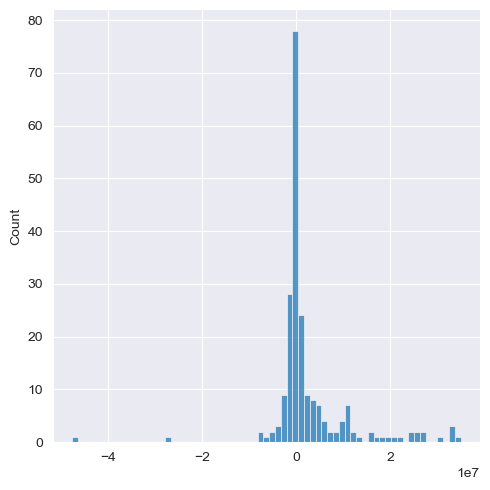

In [206]:
## residuals
resids = np.exp(y_test) - np.exp(X_test['las_y_pred'])
sns.displot(resids)
plt.show()

In [207]:
shapiro_test = stats.shapiro(resids)
shapiro_test

ShapiroResult(statistic=0.6948585510253906, pvalue=1.9494562284237287e-19)

In [208]:
## A value of 0.69 suggests that it could be normally distributed, but not definitive
## I continue to the analysis for the other comps dataset

In [209]:
results = statsmodel_log(X_forwards_other, 'market_value_in_eur', feature_columns, 1)

the RMSE is 2413982.1224143603


In [210]:
## same as before

model = Ridge()
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)
param = {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'alpha': [0.5, 1, 5, 10, 25, 100],
    'positive': [True, False]
}
search = GridSearchCV(model, param, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)
result = search.fit(X_train[feature_columns], y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.698065525866971
Best Hyperparameters: {'alpha': 10, 'positive': False, 'solver': 'svd'}


C:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 712, in fit
    raise ValueError(
ValueError: solver='svd' 

In [211]:
## modelling and RMSE for training set

reg_rdg = linear_model.Ridge(alpha=10, positive=False, solver='svd')
rdg_results_forwards_other = reg_rdg.fit(X_train[feature_columns], y_train)
X_train['rdg_y_pred'] = rdg_results_forwards_other.predict(X_train[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_train), np.exp(X_train['rdg_y_pred']))
print(rmse)

2372987.912439779


In [212]:
## RMSE for training set

X_test['rdg_y_pred'] = rdg_results_forwards_other.predict(X_test[feature_columns])
rmse = statsmodels.tools.eval_measures.rmse(np.exp(y_test), np.exp(X_test['rdg_y_pred']))
print(rmse)

2019084.6684738805


In [ ]:
## It seems like there is slight underfitting, but this is a much better model than Model 5

## I chose Model 6 as my final Capstone model. For the following reasons:
## 1. I ran out of time, I had tried out many models and improved on the ones that shown improvements along the way, there could have been a better approach
## 2. The extreme outliers in the footballer values had significant impact on the modelling, a further split would probably show more improvement. I chose not to drop the
## outliers because I wanted a realistic model and not just a model for the lower end of the spectrum

## The function

In [218]:
## For the Capstone, I also wrote a function that takes in user input and returns a market value
## The inputs needed are the features required for model 6, for the function to work, requires the section Model 6 to be ran beforehand
## the function is not finished and only predicts forward pricings

def player_market_value(position):

    if position == 'Forward':
        overall_score = input('Enter overall score: ')
        potential_score = input('Enter potential score: ')
        Height = input('Enter Height(in cm): ')
        Weight = input('Enter Weight(in kg): ')
        Age = input('Enter age: ')
        ball_skills = input('Enter ball skills score: ')
        Mental = input('Enter mental score: ')
        Passing = input('Enter passing score: ')
        Physical = input('Enter physical score: ')
        Shooting = input('Enter shooting score: ')
        foot = input('Enter preferred foot (right/left): ')
        if foot == 'right':
            preferred_foot_Right = 1
        else:
            preferred_foot_Right = 0
        position = input('Choose from these positions: Centre Forward, Left Winger, Right Winger, Second Striker')
        sub_position_Centre_Forward = 0
        sub_position_Left_Winger = 0
        sub_position_Right_Winger = 0
        sub_position_Second_Striker = 0
        if position == 'Centre Forward':
            sub_position_Centre_Forward = 1
        elif position == 'Left Winger':
            sub_position_Left_Winger = 1
        elif position == 'Right Winger':
            sub_position_Right_Winger = 1
        elif position == 'Second Striker':
            sub_position_Second_Striker = 1

        country = input('Choose from these countries: Argentina, Belgium, Brazil, Croatia, Denmark, England, France, Germany, Italy, Morocco, Netherlands, Nigeria, Norway, Poland, Portugal, Scotland, Senegal, Spain, Sweden, Turkey or other')
        country_groups_Belgium = 0
        country_groups_Brazil = 0
        country_groups_Croatia = 0
        country_groups_Denmark = 0
        country_groups_England = 0
        country_groups_France = 0
        country_groups_Germany = 0
        country_groups_Italy = 0
        country_groups_Morocco = 0
        country_groups_Netherlands = 0
        country_groups_Nigeria = 0
        country_groups_Norway = 0
        country_groups_Poland = 0
        country_groups_Portugal = 0
        country_groups_Scotland = 0
        country_groups_Senegal = 0
        country_groups_Spain = 0
        country_groups_Sweden = 0
        country_groups_Turkey = 0
        country_groups_other = 0
        if country == 'Belgium':
            country_groups_Belgium = 1
        elif country == 'Brazil':
            country_groups_Brazil = 1
        elif country == 'Croatia':
            country_groups_Croatia = 1
        elif country == 'Denmark':
            country_groups_Denmark = 1
        elif country == 'England':
            country_groups_England = 1
        elif country == 'France':
            country_groups_France = 1
        elif country == 'Germany':
            country_groups_Germany = 1
        elif country == 'Italy':
            country_groups_Italy = 1
        elif country == 'Morocco':
            country_groups_Morocco = 1
        elif country == 'Netherlands':
            country_groups_Netherlands = 1
        elif country == 'Nigeria':
            country_groups_Nigeria = 1
        elif country == 'Norway':
            country_groups_Norway = 1
        elif country == 'Poland':
            country_groups_Poland = 1
        elif country == 'Portugal':
            country_groups_Portugal = 1
        elif country == 'Scotland':
            country_groups_Scotland = 1
        elif country == 'Senegal':
            country_groups_Senegal = 1
        elif country == 'Spain':
            country_groups_Spain = 1
        elif country == 'Sweden':
            country_groups_Sweden = 1
        elif country == 'Turkey':
            country_groups_Turkey = 1
        elif country == 'other':
            country_groups_other = 1

        row = {'overall_score': overall_score, 'potential_score': potential_score, 'Height': Height, 'Weight': Weight, 'Age': Age, 'ball_skills': ball_skills, 'Mental': Mental, 'Passing':Passing, 'Physical':Physical, 'Shooting':Shooting, 'preferred_foot_Right': preferred_foot_Right, 'sub_position_Centre_Forward':sub_position_Centre_Forward, 'sub_position_Left_Winger': sub_position_Left_Winger, 'sub_position_Right_Winger':sub_position_Right_Winger, 'sub_position_Second_Striker':sub_position_Second_Striker, 'country_groups_Belgium':country_groups_Belgium, 'country_groups_Brazil':country_groups_Brazil, 'country_groups_Croatia':country_groups_Croatia, 'country_groups_Denmark':country_groups_Denmark, 'country_groups_England':country_groups_England, 'country_groups_France':country_groups_France, 'country_groups_Germany':country_groups_Germany, 'country_groups_Italy':country_groups_Italy, 'country_groups_Morocco':country_groups_Morocco, 'country_groups_Netherlands':country_groups_Netherlands, 'country_groups_Nigeria':country_groups_Nigeria, 'country_groups_Norway':country_groups_Norway, 'country_groups_Poland':country_groups_Poland, 'country_groups_Portugal':country_groups_Portugal, 'country_groups_Scotland':country_groups_Scotland, 'country_groups_Senegal':country_groups_Senegal, 'country_groups_Spain':country_groups_Spain, 'country_groups_Sweden':country_groups_Sweden, 'country_groups_Turkey':country_groups_Turkey, 'country_groups_other':country_groups_other}

        single_row = pd.DataFrame(row, index = [0])
        comp = input('Is the player from Premier League, Ligue 1, Seria A, Bundesliga or La Liga? (Yes/No)')

        if comp == 'Yes':
            market_value = np.exp(las_results_forwards_major.predict(single_row))
        else:
            market_value = np.exp(rdg_results_forwards_other.predict(single_row))

        return format(market_value[0], '.2f')

In [ ]:
## Information on R9, stats taken from R9 icon card from FIFA 20

R9 = [overall = 96, potential 96, height 183, age 20, weight n/a, ball_skills 96.5, mental 74.67, passing 78, physical 88.29, shooting 90.875, preferred_foot right, position striker, country brazil, comp it1]

In [219]:
player_market_value('Forward')

'874514677.65'

In [220]:
## A market value of 874m is predicted, which could be valid since its R9?
## I do not have actual market value for R9 in 2023, so there is no way to know how accurate this is ...